In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense
from tensorflow.keras.models import Model

In [26]:
# Load data
ratings = pd.read_csv('Data/ratings.csv')
movies = pd.read_csv('Data/movies.csv')

# Convert user and movie IDs to sequential integers
user_ids = ratings['userId'].unique()
user_id_map = {id:i for i, id in enumerate(user_ids)}
movie_ids = movies['movieId'].unique()
movie_id_map = {id:i for i, id in enumerate(movie_ids)}
ratings['user_id'] = ratings['userId'].map(user_id_map)
ratings['movie_id'] = ratings['movieId'].map(movie_id_map)

In [27]:
# Split data into training and testing sets
train_data = ratings.sample(frac=0.8, random_state=0)
test_data = ratings.drop(train_data.index)

In [28]:
# Create model
num_users = len(user_ids)
num_movies = len(movie_ids)
embedding_size = 32

user_input = Input(shape=[1])
movie_input = Input(shape=[1])

user_embedding = Embedding(num_users, embedding_size)(user_input)
movie_embedding = Embedding(num_movies, embedding_size)(movie_input)

user_flat = Flatten()(user_embedding)
movie_flat = Flatten()(movie_embedding)

dot = Dot(axes=1)([user_flat, movie_flat])
output = Dense(1, activation='sigmoid')(dot)

model = Model(inputs=[user_input, movie_input], outputs=output)

In [34]:
# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train model
history = model.fit([train_data['user_id'], train_data['movie_id']], train_data['rating'],validation_data=([train_data['user_id'], train_data['movie_id']], train_data['rating']), epochs=5)

# Evaluate model
model.evaluate([test_data['user_id'], test_data['movie_id']], test_data['rating'])

Epoch 1/5
2521/2521 [==============================] - 11s 4ms/step - loss: -64630.2812 - accuracy: 0.0279 - val_loss: -72952.5000 - val_accuracy: 0.0279
Epoch 2/5
2521/2521 [==============================] - 10s 4ms/step - loss: -82096.5234 - accuracy: 0.0279 - val_loss: -92081.6328 - val_accuracy: 0.0279
Epoch 3/5
2521/2521 [==============================] - 11s 4ms/step - loss: -102769.1484 - accuracy: 0.0279 - val_loss: -114353.8828 - val_accuracy: 0.0279
Epoch 4/5
2521/2521 [==============================] - 11s 4ms/step - loss: -126619.7188 - accuracy: 0.0279 - val_loss: -139852.2344 - val_accuracy: 0.0279
Epoch 5/5
631/631 [==============================] - 0s 650us/step - loss: -165172.5469 - accuracy: 0.0267


[-165172.546875, 0.02672683075070381]

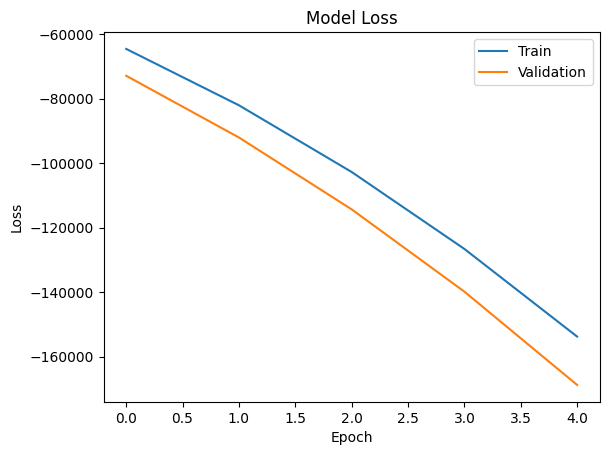

In [35]:
# Plot loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
